# Categorização de imagens utilizando CNN - CIFAR10

Fonte: https://keras.io/api/datasets/cifar10/

Importante: Para este exemplo será preciso ativar a GPU para diminuir o tempo de processamento.

Para isso, clique em Editar > Configurações de notebook > GPU.

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [30]:
# Bibliotecas de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

## Etapa 02
Importar a base de dados CIFAR10 do Keras.

Curiosidade: O Keras fornece um conjunto de base de dados para aprendizado. Veja mais em: https://keras.io/api/datasets/

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

##Etapa 03
Conhecer e plotar a base de dados.

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)
Classes de imagens:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


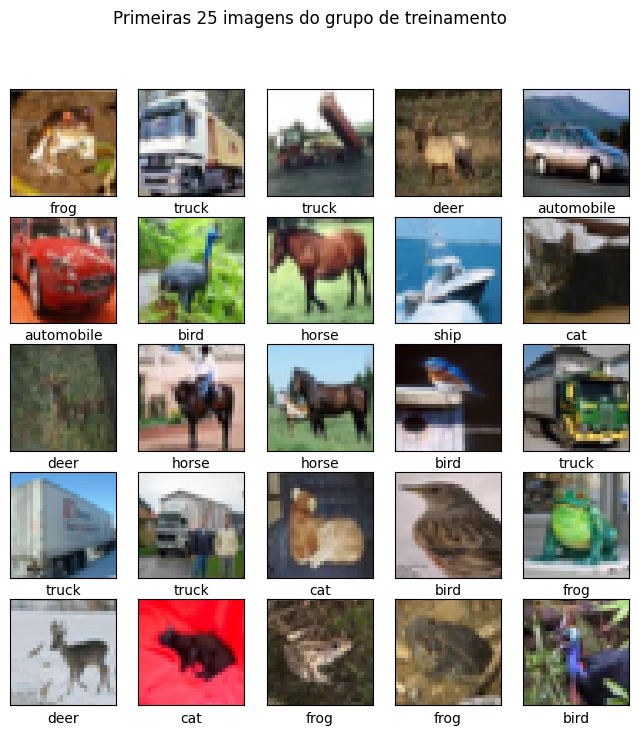

In [32]:
# Nome das categorias:
# Label Descrição
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

# Verificar a quantidade de dados para treinamento e validação
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

# Define uma lista com os nomes das categorias
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Classes de imagens: ', class_names)

# Plotar imagem
plt.figure(figsize=(8,8))
plt.suptitle('Primeiras 25 imagens do grupo de treinamento')
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
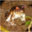

In [33]:
x_train[0,:,:]

## Etapa 04
Pré-processar as imagens de forma que os valores de intensidade para os pixels fiquem entre 0 e 1 e adicionar uma dimensão a mais em x_train e x_test para que fiquem com 4 dimensões no formato aceito pela CNN.

Formato aceito: (qtd imagens, qtd linhas, qtd colunas, qtd canais)

In [34]:
x_train = x_train / 255
x_test = x_test / 255

## Etapa 05
Construir a rede neural utilizando o Keras.

In [35]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,517,450 (5.79 MB)

 Trainable params: 1,515,658 (5.78 MB)

 Non-trainable params: 1,792 (7.00 KB)

## Etapa 06
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [38]:
  optimizer = keras.optimizers.Adam()
  model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Etapa 07
Treinar o modelo e realizar a validação.

In [39]:
  history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Acurácia do modelo')
  plt.ylabel('Acurácia')
  plt.xlabel('Épocas')
  plt.legend(['treinamento', 'validação'], loc='upper left')
  plt.show()

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.3625 - loss: 1.9771 - val_accuracy: 0.6348 - val_loss: 1.0399
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.6477 - loss: 1.0115 - val_accuracy: 0.6921 - val_loss: 0.8858
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.7304 - loss: 0.7799 - val_accuracy: 0.7621 - val_loss: 0.6908
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7774 - loss: 0.6522 - val_accuracy: 0.7988 - val_loss: 0.5850
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8095 - loss: 0.5621 - val_accuracy: 0.7347 - val_loss: 0.8133
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8357 - loss: 0.4809 - val_accuracy: 0.8224 - val_loss: 0.5287
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8570 - loss: 0.4198 - val_accuracy: 0.8140 - val_loss: 0.5546
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 

KeyboardInterrupt: 

##Etapa 08
Realizar algumas predições. Experimente variar a amostra (variável i).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


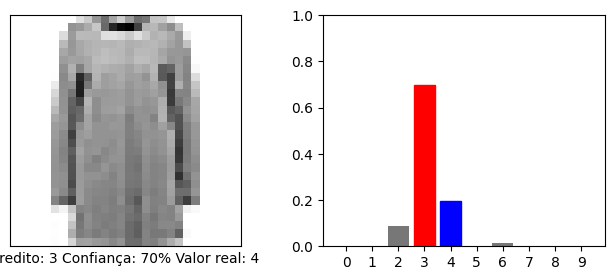

In [ ]:
predictions = model.predict(x_test)
i = 150

def plot_image(prediction_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
  predicted_label = np.argmax(prediction_array)
  plt.xlabel('Predito: {} Confiança: {:2.0f}% Valor real: {}'.format(predicted_label, 100*np.max(prediction_array), true_label))

def plot_rate(prediction_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(predictions[i], y_test[i], x_test[i])
plt.subplot(1,2,2)
plot_rate(predictions[i], y_test[i])
plt.show()

In [ ]:
predictions[25]

array([4.19455209e-05, 1.29436355e-08, 1.79758132e-01, 1.30411160e-09,
       6.30379915e-01, 1.00506816e-11, 1.89820021e-01, 4.35952569e-15,
       9.75779724e-09, 1.84991272e-10], dtype=float32)

##Etapa 09
Encontrar todas as predições erradas.

In [ ]:
error_classification = []

for i in range(len(predictions)):
  if (np.argmax(predictions[i]) != y_test[i]):
    error_classification.append(i)

print('Total de predições erradas: ', len(error_classification))
print('Lista das predições erradas: ', error_classification)

Total de predições erradas:  693
Lista das predições erradas:  [12, 23, 42, 49, 67, 68, 98, 103, 107, 135, 147, 150, 244, 283, 285, 316, 324, 325, 361, 374, 378, 381, 382, 392, 410, 441, 444, 452, 457, 460, 510, 511, 529, 548, 565, 569, 600, 607, 628, 634, 664, 670, 688, 711, 722, 724, 732, 753, 760, 787, 851, 893, 905, 921, 930, 937, 960, 963, 965, 971, 977, 979, 1000, 1005, 1025, 1029, 1058, 1101, 1104, 1111, 1131, 1139, 1162, 1174, 1194, 1197, 1210, 1231, 1236, 1249, 1254, 1300, 1305, 1323, 1329, 1336, 1408, 1425, 1449, 1462, 1469, 1471, 1482, 1487, 1496, 1509, 1522, 1527, 1533, 1572, 1602, 1620, 1626, 1632, 1642, 1643, 1645, 1650, 1665, 1686, 1706, 1731, 1743, 1744, 1763, 1771, 1810, 1836, 1852, 1930, 1942, 1943, 1953, 1964, 1968, 1980, 2001, 2006, 2022, 2037, 2062, 2067, 2089, 2106, 2162, 2195, 2224, 2278, 2290, 2309, 2311, 2316, 2318, 2326, 2337, 2352, 2396, 2425, 2469, 2476, 2485, 2500, 2506, 2507, 2509, 2540, 2548, 2551, 2571, 2588, 2589, 2593, 2599, 2603, 2617, 2629, 2641, 265